# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [7]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [26]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) 
    FROM products 
    WHERE price < 10;
""")


rows = cursor.fetchall()
print(rows)





[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [27]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNTRY,
            COUNT (COUNTRY) as numberofsuppliers
            FROM suppliers
            GROUP BY COUNTRY 
            ORDER BY numberofsuppliers DESC
               
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)


[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


        Country  Frequency
0           USA         13
1       Germany         11
2        France         11
3        Brazil          9
4            UK          7
5         Spain          5
6        Mexico          5
7     Venezuela          4
8         Italy          3
9        Canada          3
10    Argentina          3
11  Switzerland          2
12       Sweden          2
13     Portugal          2
14      Finland          2
15      Denmark          2
16      Belgium          2
17      Austria          2
18       Poland          1
19       Norway          1
20      Ireland          1


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_7229/1954740418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Country', data=df, palette='viridis')


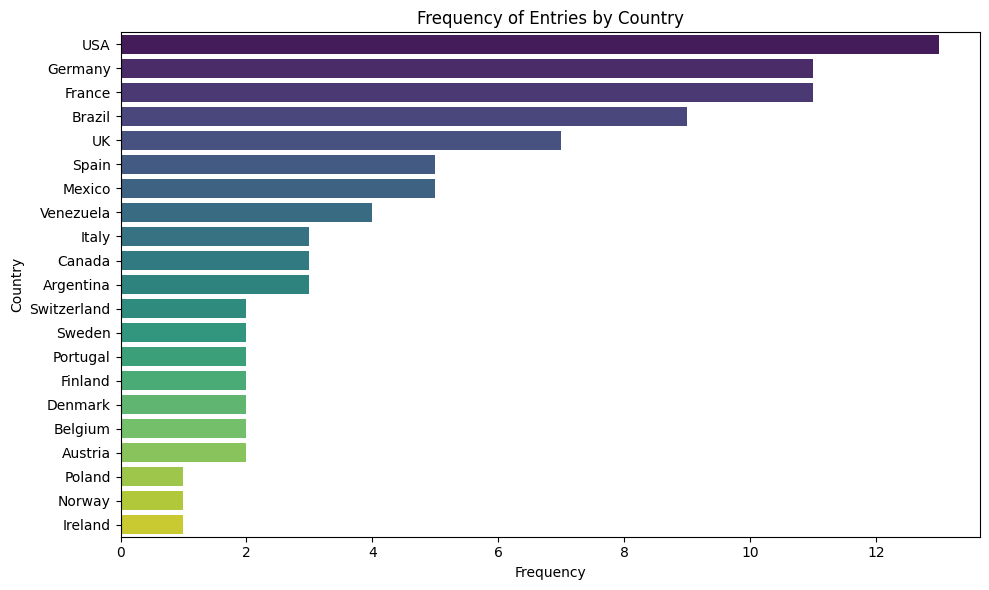

In [23]:
# TODO: Convert your list of tuples to a dataframe
data = [('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]

df = pd.DataFrame(rows, columns=['Country', 'Frequency'])
print(df)

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Country', data=df, palette='viridis')
plt.title('Frequency of Entries by Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [21]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
   SELECT Country,
       COUNT(*) AS number_of_customers
FROM Customers
GROUP BY Country
ORDER BY number_of_customers DESC;

""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_7229/455352822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Customers', y='Country', data=df, palette='mako')


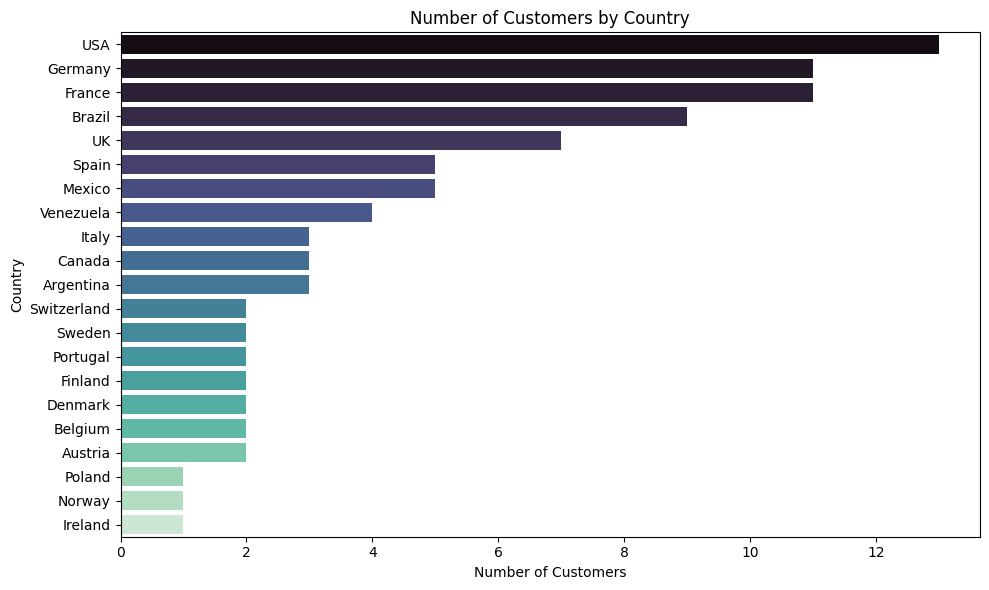

In [22]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Number of Customers'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Customers', y='Country', data=df, palette='mako')
plt.title('Number of Customers by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [15]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName,
           SUM(od.Quantity) AS total_quantity
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY total_quantity ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)


ProgrammingError: Cannot operate on a closed database.

/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_7229/4067807884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Quantity', y='ProductName', data=df, palette='rocket')


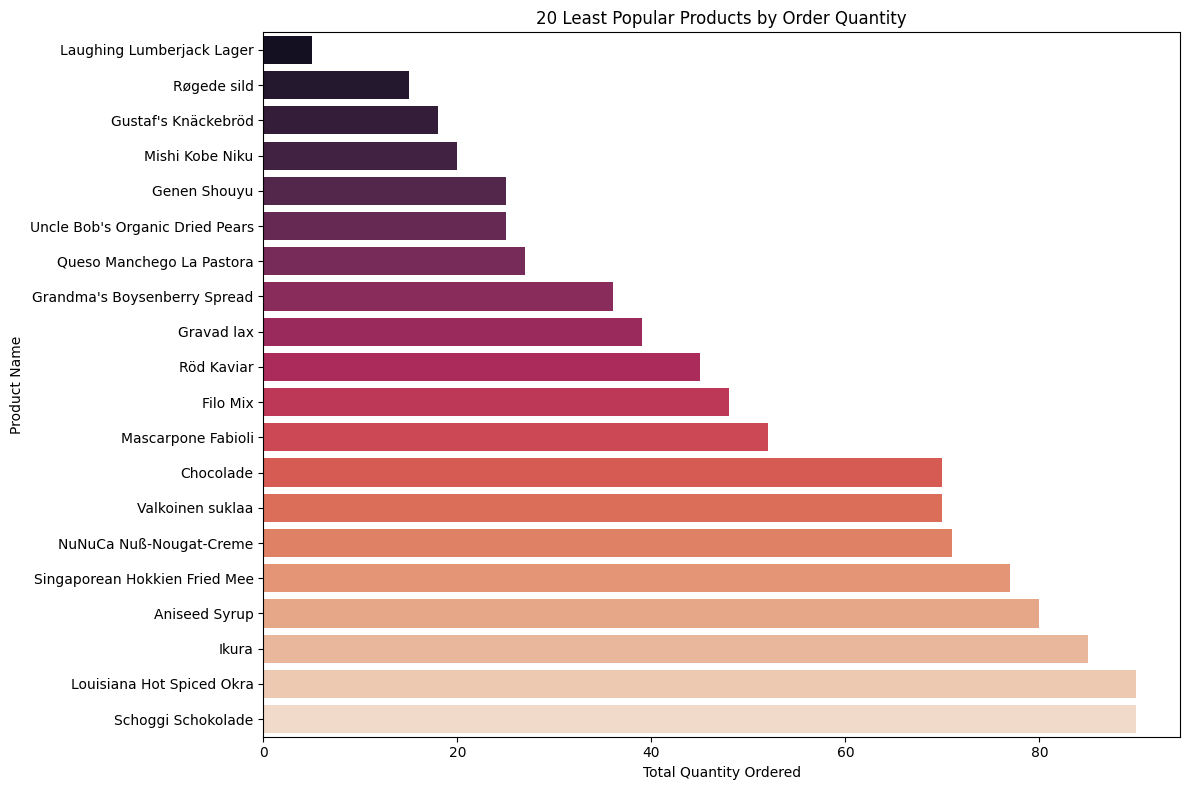

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'Total Quantity'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Quantity', y='ProductName', data=df, palette='rocket')
plt.title('20 Least Popular Products by Order Quantity')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


In [32]:
import sqlite3
conn = sqlite3.connect("db/Market.db")  # ← ✅ Confirm this path is correct
cursor = conn.cursor()


In [33]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())



[('Categories',), ('sqlite_sequence',), ('Customers',), ('Employees',), ('Shippers',), ('Suppliers',), ('Products',), ('Orders',), ('OrderDetails',)]


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [35]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName,
           SUM(od.Quantity * p.Price) AS total_revenue
    FROM OrderDetails od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY total_revenue ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)







[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_4608/392200123.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='ProductName', data=df, palette='flare')


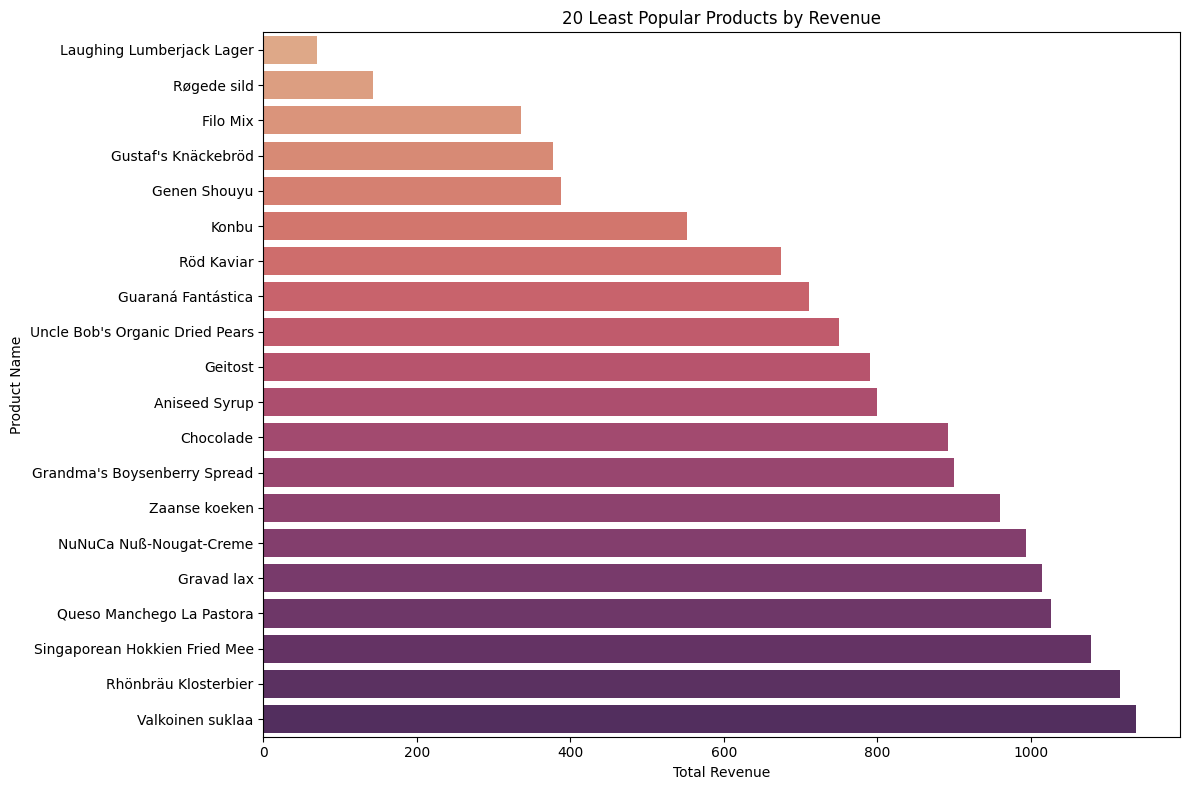

In [36]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'Total Revenue'])


# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Revenue', y='ProductName', data=df, palette='flare')
plt.title('20 Least Popular Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()



### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [37]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT c.Country,
           COUNT(o.OrderID) AS total_orders
    FROM Orders o
    JOIN Customers c ON o.CustomerID = c.CustomerID
    GROUP BY c.Country
    ORDER BY total_orders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)


[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_4608/2612857714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Orders', y='Country', data=df, palette='crest')


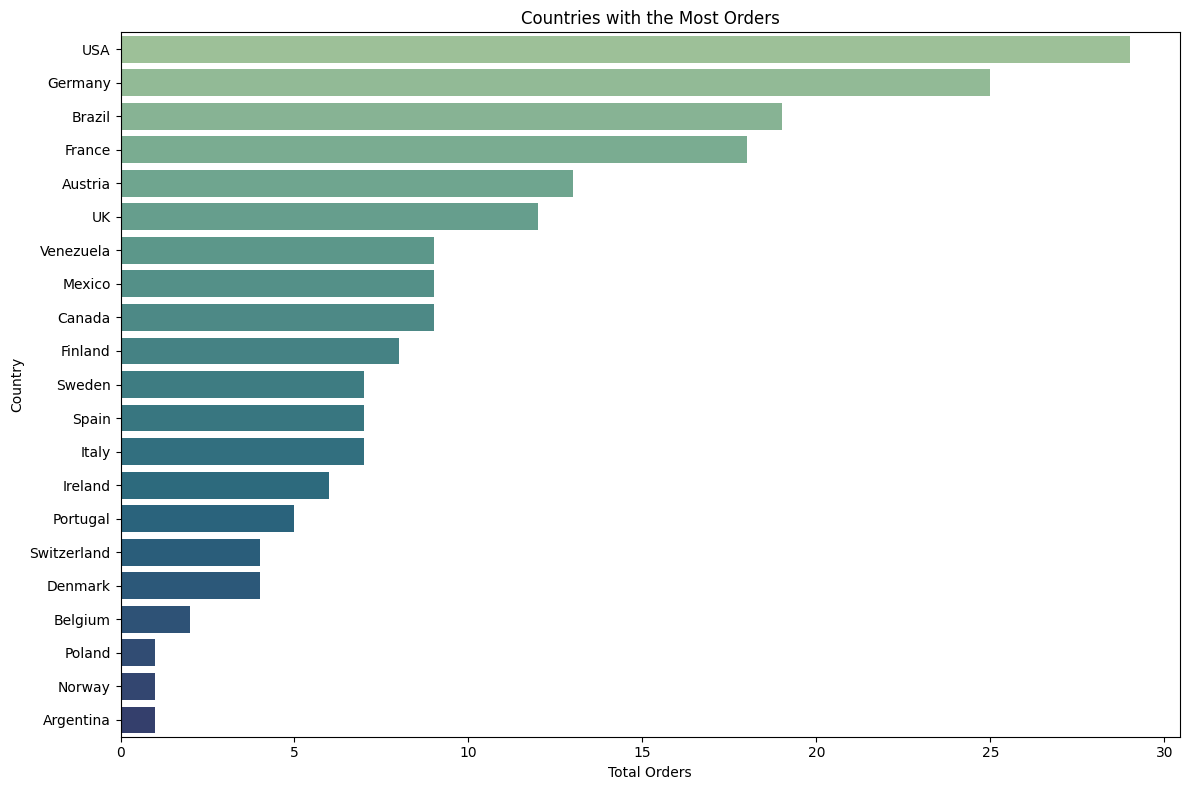

In [38]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Total Orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Orders', y='Country', data=df, palette='crest')
plt.title('Countries with the Most Orders')
plt.xlabel('Total Orders')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT c.Country,
           COUNT(*) AS customers_without_orders
    FROM Customers c
    LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
    WHERE o.OrderID IS NULL
    GROUP BY c.Country
    ORDER BY customers_without_orders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)


[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_4608/3580296420.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customers Without Orders', y='Country', data=df, palette='rocket')


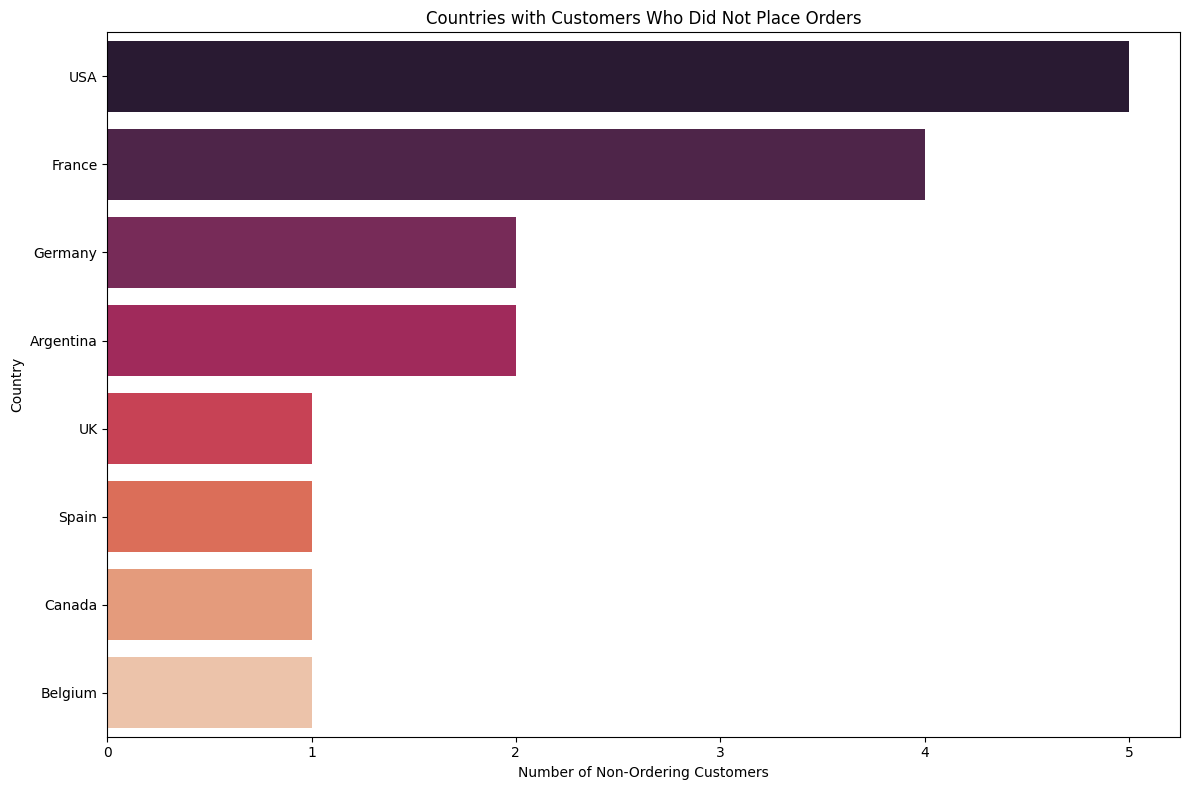

In [41]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Customers Without Orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 8))
sns.barplot(x='Customers Without Orders', y='Country', data=df, palette='rocket')
plt.title('Countries with Customers Who Did Not Place Orders')
plt.xlabel('Number of Non-Ordering Customers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [42]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT s.SupplierName,
           COUNT(od.OrderID) AS total_orders
    FROM Suppliers s
    JOIN Products p ON s.SupplierID = p.SupplierID
    JOIN OrderDetails od ON p.ProductID = od.ProductID
    GROUP BY s.SupplierName
    ORDER BY total_orders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)


[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


/var/folders/z_/j64wvfz51r91wny8ltdk6mjh0000gn/T/ipykernel_4608/1413554408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Orders', y='Supplier Name', data=df, palette='mako')


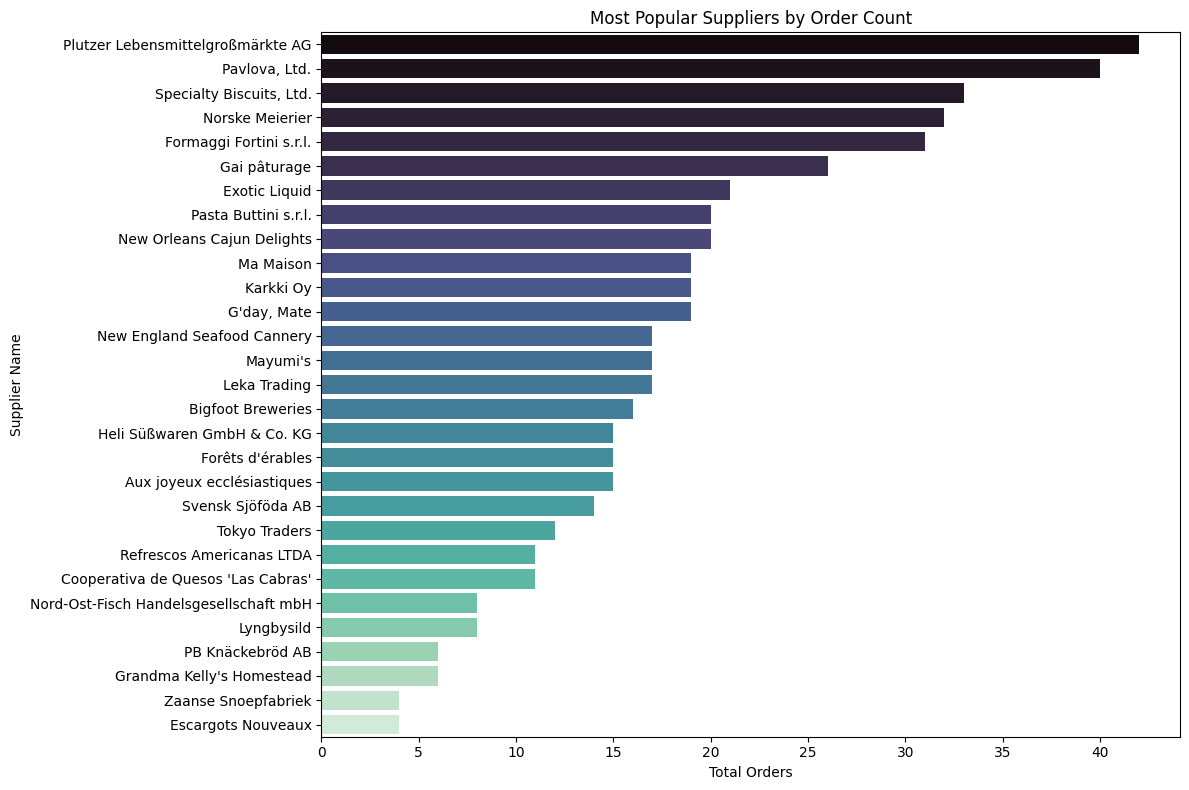

In [43]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Supplier Name', 'Total Orders'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Orders', y='Supplier Name', data=df, palette='mako')
plt.title('Most Popular Suppliers by Order Count')
plt.xlabel('Total Orders')
plt.ylabel('Supplier Name')
plt.tight_layout()
plt.show()


## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[The USA had the greatest number of customer according to the data and chart. More customers leads to more suppliers because its about demand with the US in the lead with the most customers followed by germany.]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[The least popular product by order quantity is laughing lumberjack lager this correlate with revenue because the demand for this product is very low which will result in poor sales for the product]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Couldnt answer this question because its for question 6 ]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[The supplier with the most orders is Schoggi Schokolade]